In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf


%matplotlib inline 

# ML training and tuning 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Explore the Data

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.describe(exclude = 'number')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Perform a train-test split on your data

In [8]:
# Feature set 
X = df.iloc[:, 0:11]

# The target will be the last column --> whether they have heart disase or not
y = df.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Encoding categorical data


In [10]:
# Encoding categorical features

enc = OneHotEncoder()

X_train_enc = enc.fit_transform(X_train[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

X_test_enc = enc.transform(X_test[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

In [11]:
enc.categories_[0]

array(['F', 'M'], dtype=object)

In [12]:
enc.get_feature_names()

C:\Users\esooo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_F', 'x0_M', 'x1_ASY', 'x1_ATA', 'x1_NAP', 'x1_TA', 'x2_LVH',
       'x2_Normal', 'x2_ST', 'x3_N', 'x3_Y', 'x4_Down', 'x4_Flat',
       'x4_Up'], dtype=object)

In [13]:
# add back encoded columns to dataframe
X_train[enc.get_feature_names()] = X_train_enc.toarray()
X_test[enc.get_feature_names()] = X_test_enc.toarray()

In [14]:
X_train.drop(columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], inplace=True)
X_test.drop(columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], inplace=True)

In [15]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,x0_F,x0_M,x1_ASY,x1_ATA,x1_NAP,x1_TA,x2_LVH,x2_Normal,x2_ST,x3_N,x3_Y,x4_Down,x4_Flat,x4_Up
378,70,140,0,1,157,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
356,46,115,0,0,113,1.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
738,65,160,360,0,151,0.8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
85,66,140,139,0,94,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
427,59,140,0,0,117,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,110,239,0,126,2.8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
192,48,130,245,0,160,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
629,57,128,303,0,159,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
559,64,134,273,0,102,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


# Feature Scaling

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Building the ANN

# First Model 

### Initializing the ANN

In [68]:
#this is feedforwared model 
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [69]:
# The 1st hidden layer will have 9 units (100 nerouns) and the activation function is relu

ann.add(tf.keras.layers.Dense(units=100, activation='LeakyReLU'))

### Adding the second hidden layer

In [70]:
# The 2nd hidden layer will have 100 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=100, activation='LeakyReLU'))

### Adding the output layer

In [71]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [72]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [73]:
# Note: use y_train.values and not y_train since this will raise an error

history = ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8147
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8692
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8815
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8856
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.8883
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8910
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8910
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.8924
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8910
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.8978
Epoch 11/

23/23 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9728
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9768
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9823
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9796
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9782
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.9782
Epoch 89/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9823
Epoch 90/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9809
Epoch 91/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9850
Epoch 92/100
23/23 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9755
Epoch 93/100


## Part 4 - Making the predictions and evaluating the model


Predicting the result of a single observation
Example

Use our ANN model to predict if the person with the following informations will have heart disase:

Age: 70
RestingBP:140	
Cholesterol:0
FastingBS:1
MaxHR:157
Oldpeak:2
sex: 01 #x0
ChestPainType:1000 #x1
RestingECG: 010 #x2
ExerciseAngina: 01 #x3
ST_Slope :010 #x4

In [74]:
# Note: Dont forget that dumpy variables were positioned at the beginning
# Note: your input/customer_info should be in a double square brackets

# Note: the output of the prediction is a probability "%"
# You can define the cut-off value for classification to improve the model performance
# This depends on the dataset and it is empirical "trial and error"

#print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) )
# the result means :person not leaving the banke
print(ann.predict(sc.transform([[70, 140,0,1,157,2,0,1,1,0,0,0,0,1,0,0,1,0,1,0]]))>0.5 )

1/1 [==============================] - 0s 44ms/step
[[ True]]


C:\Users\esooo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [75]:
#chech the ansewer
df.loc[(df['Age'] == 70) & (df['RestingBP'] == 140) &(df['MaxHR'] == 157) ]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
378,70,M,ASY,140,0,1,Normal,157,Y,2.0,Flat,1


### Predicting the Test set results

In [76]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)


6/6 [==============================] - 0s 1ms/step


### Making the Confusion Matrix

In [77]:

print(classification_report(y_test, y_pred))

# Note: This will not work for ANN keras 
#plot_confusion_matrix(ann, X=X_test, y_true=y_test, cmap='Blues')

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        77
           1       0.86      0.89      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



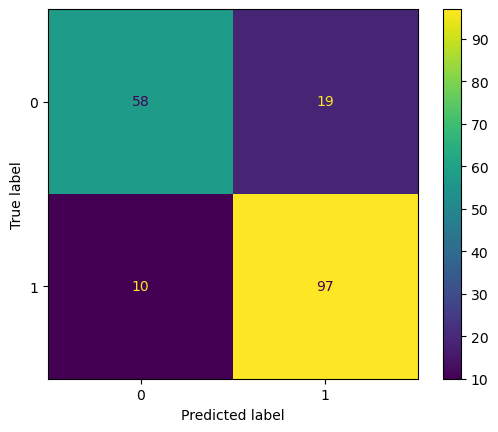

In [46]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

# Plot the model training history

dict_keys(['loss', 'accuracy'])


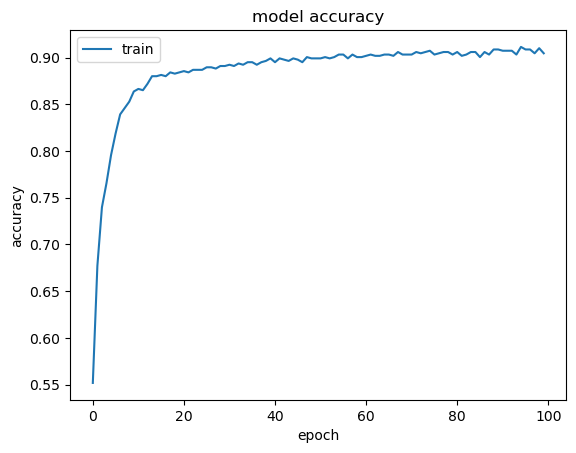

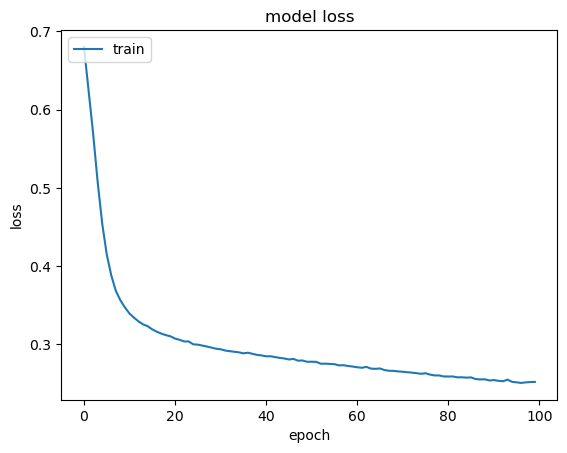

In [27]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Second Model

In [33]:
ann2 = tf.keras.models.Sequential()

In [34]:
ann2.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [35]:
ann2.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [36]:
ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [37]:
ann2.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [38]:
history2 = ann2.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 0.7729 - accuracy: 0.5586
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5858
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6403
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6866
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.7180
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7575
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5274 - accuracy: 0.7793
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5096 - accuracy: 0.8038
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.8188
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.8243
Epoch 11/

23/23 [==============================] - 0s 1ms/step - loss: 0.2504 - accuracy: 0.9060
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.9046
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9046
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2490 - accuracy: 0.9060
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2488 - accuracy: 0.9060
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2481 - accuracy: 0.9046
Epoch 89/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.9033
Epoch 90/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2477 - accuracy: 0.9046
Epoch 91/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.9060
Epoch 92/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.9046
Epoch 93/100


In [39]:
y_pred = ann2.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 2ms/step


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.89      0.90      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



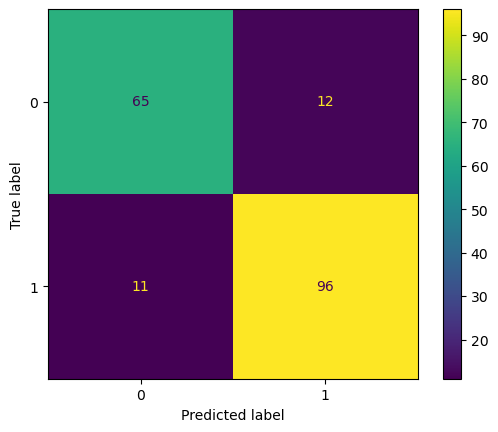

In [41]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


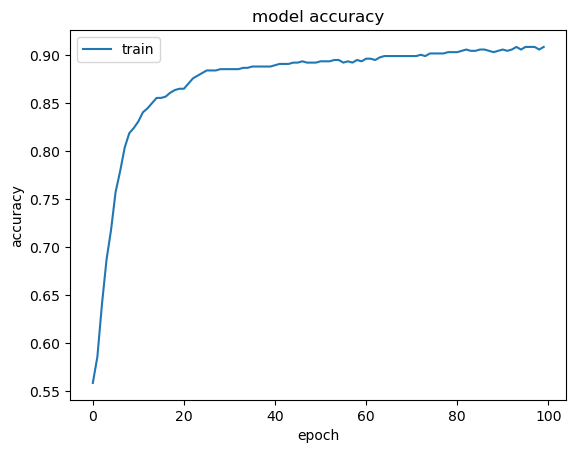

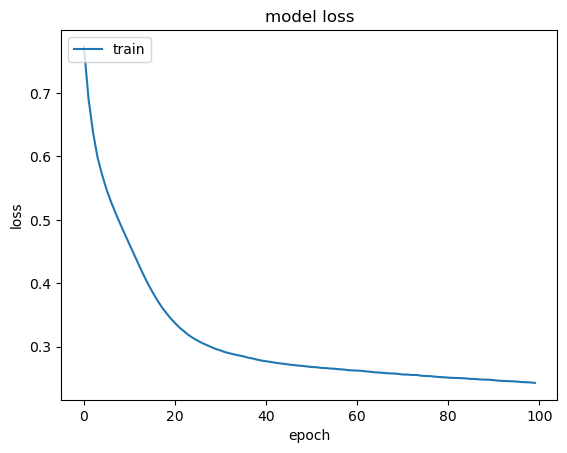

In [42]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Third Model

In [43]:
ann3 = tf.keras.models.Sequential()

In [44]:
ann3.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [45]:
ann3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [46]:
ann3.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])


In [47]:
history3 =ann3.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 0.7725 - accuracy: 0.5463
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.6431
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.7180
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.7616
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7984
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8174
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8338
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8351
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8433
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8542
Epoch 11/

23/23 [==============================] - 0s 1ms/step - loss: 0.2670 - accuracy: 0.8992
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.8978
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.8965
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.8965
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.8978
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.8978
Epoch 89/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.8978
Epoch 90/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8992
Epoch 91/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.8978
Epoch 92/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8992
Epoch 93/100


In [48]:
y_pred = ann3.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 1ms/step


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



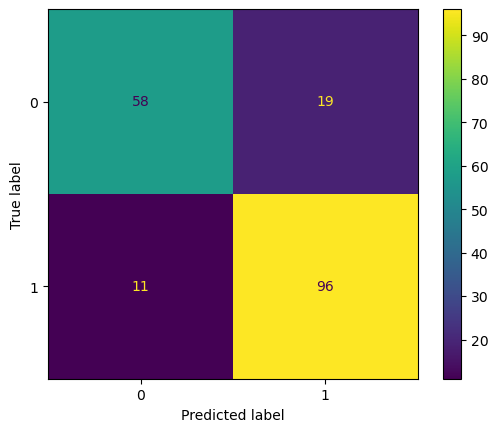

In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


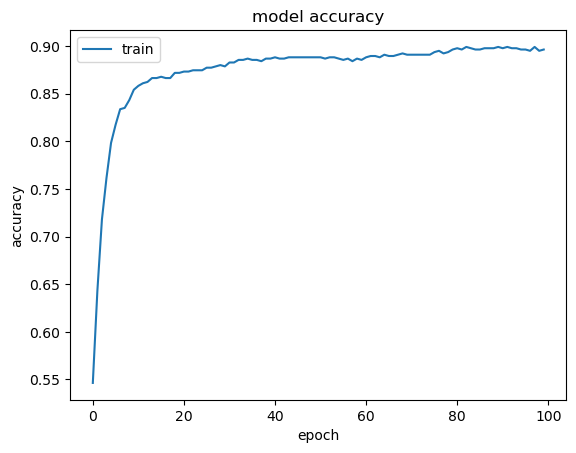

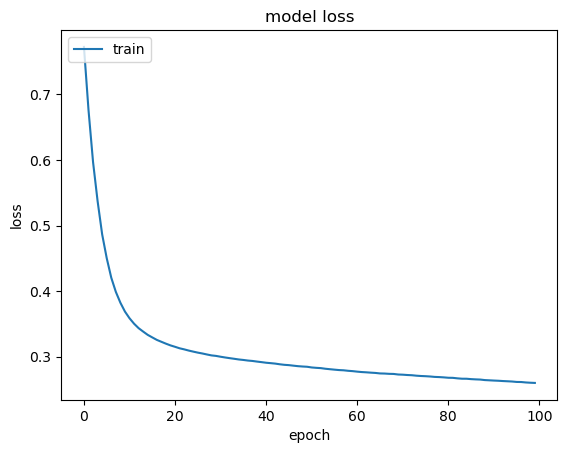

In [51]:

# list all data in history
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Fourth Model

In [52]:
#this is feedforwared model 
ann4 = tf.keras.models.Sequential()

In [53]:
# The 1st hidden layer will have 100 units (100 nerouns) and the activation function is relu

ann4.add(tf.keras.layers.Dense(units=9, activation='relu'))

In [54]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid

ann4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [55]:
ann4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
history4 = ann4.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 0.8833 - accuracy: 0.5409
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.7520 - accuracy: 0.6294
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.6962
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.7425
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7752
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.8011
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8243
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8447
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8529
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8597
Epoch 11/

23/23 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9033
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.9033
Epoch 85/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9046
Epoch 86/100
23/23 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.9033
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2658 - accuracy: 0.9033
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.9046
Epoch 89/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.9019
Epoch 90/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.9033
Epoch 91/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2641 - accuracy: 0.9033
Epoch 92/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.9046
Epoch 93/100


In [57]:
y_pred = ann4.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 2ms/step


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        77
           1       0.86      0.93      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



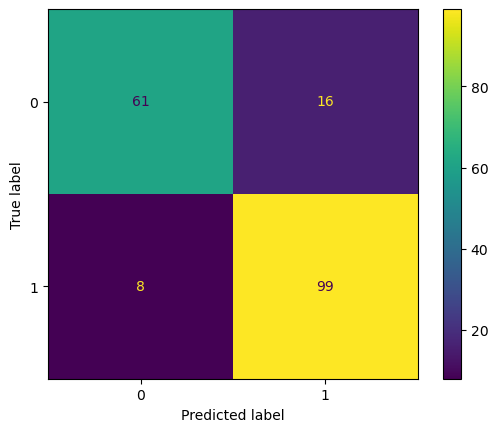

In [59]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


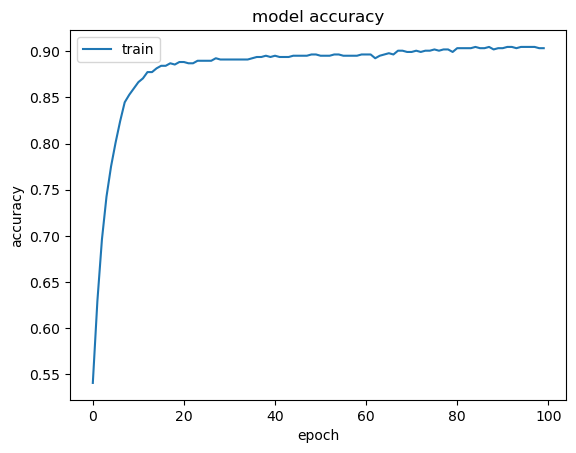

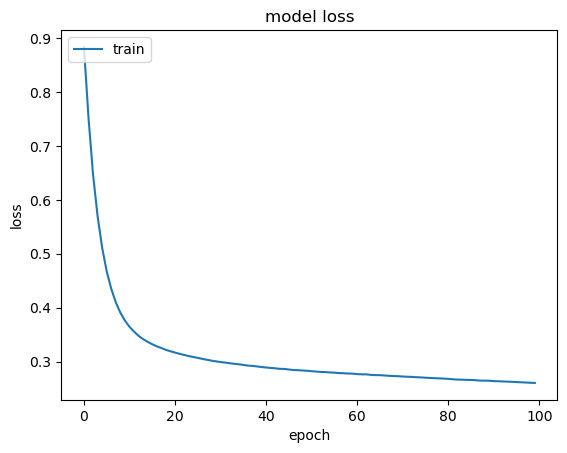

In [60]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# list all data in history
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Fifth Model

In [78]:
ann5 = tf.keras.models.Sequential()#Compiling the ANN

In [79]:
# The 1st hidden layer will have 16 units and the activation function is swish

ann5.add(tf.keras.layers.Dense(units=16, activation='swish'))


In [80]:
# The 2nd hidden layer will have 16 units and the activation function is swish

ann5.add(tf.keras.layers.Dense(units=16, activation='swish'))


In [81]:
# The activation function is the sigmoid

ann5.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [82]:
ann5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#Training the ANN



In [83]:
from tensorflow.keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [84]:
history5 =ann5.fit(X_train, y_train, batch_size = 32, epochs = 100,callbacks=[earlystopping])

Epoch 1/100
23/23 [==============================] - 0s 2ms/step - loss: 0.7812 - accuracy: 0.3556
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5327
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.7302
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8161
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.8474
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8638
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8665
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8787
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8842
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8869
Epoch 11/

23/23 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.8978
Epoch 28/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.9019
Epoch 29/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.8978
Epoch 30/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8978
Epoch 31/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.8992
Epoch 32/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.8992
Epoch 33/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.9005
Epoch 34/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2528 - accuracy: 0.9005
Epoch 35/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2516 - accuracy: 0.9005
Epoch 36/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2503 - accuracy: 0.9019
Epoch 37/100


23/23 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9101
Epoch 55/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9087
Epoch 56/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9114
Epoch 57/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9087
Epoch 58/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2236 - accuracy: 0.9114
Epoch 59/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9128
Epoch 60/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2211 - accuracy: 0.9128
Epoch 61/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9128
Epoch 62/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9142
Epoch 63/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.9155
Epoch 64/100


23/23 [==============================] - 0s 1ms/step - loss: 0.1991 - accuracy: 0.9183
Epoch 81/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1982 - accuracy: 0.9183
Epoch 82/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9183
Epoch 83/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1959 - accuracy: 0.9237
Epoch 84/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9169
Epoch 85/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 0.9278
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9183
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9237
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9264
Epoch 89/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9237
Epoch 90/100


In [87]:
y_pred = ann5.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 1ms/step


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



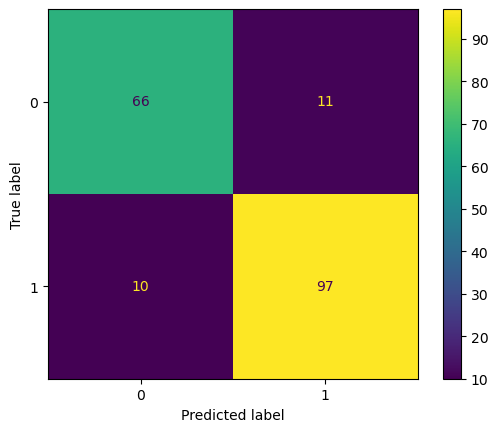

In [89]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

dict_keys(['loss', 'accuracy'])


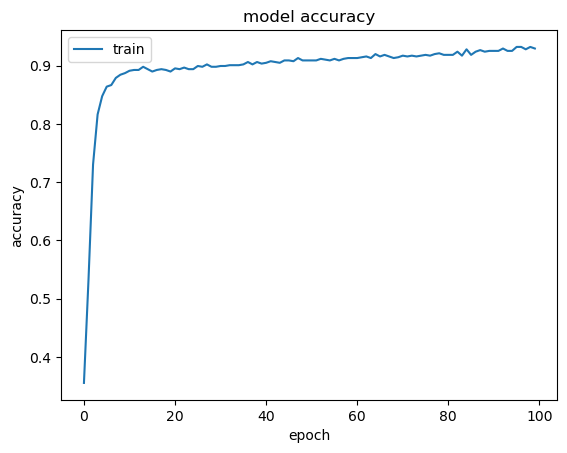

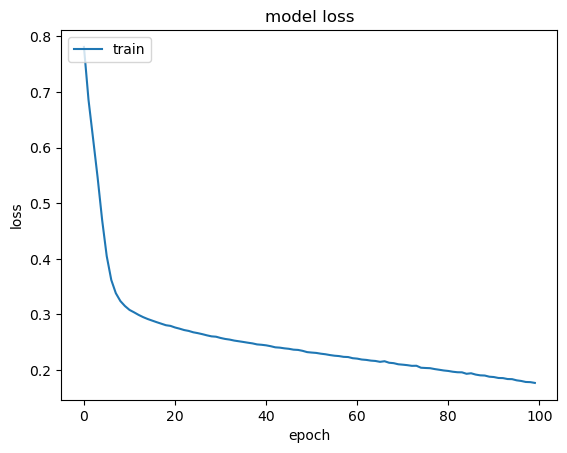

In [90]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# list all data in history
print(history5.history.keys())
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()